# Decision Tree Algorithm

Course: DS312 - Data Mining and Applications \
Instructor: Jhun Brian M. Andam

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [3]:
df = pd.read_excel('data/sample_data.xlsx', sheet_name='data')
df

,age,has_job,own_house,credit_rating,class
0,young,False,False,fair,no
1,young,False,False,good,no
2,young,True,False,good,yes
3,young,True,True,fair,yes
4,young,False,False,fair,no
5,middle,False,False,fair,no
6,middle,False,False,good,no
7,middle,True,True,good,yes
8,middle,False,True,excellent,yes
9,middle,False,True,excellent,yes


### Dataset Entropy $entropy(D)$

\begin{equation}
    entropy(D) = -\sum_{j=1}^{|C|}{Pr(C_j) \times \log_2{Pr(C_j)}}
\end{equation}

Where:
- $D$ denotes the dataset,
- $C$ is the categorical feature,
- $Pr(C_j)$ is the probability of the category $C_j$ occurring in the dataset.

In [3]:
n = len(df)
yes = (df['class'] == 'yes').sum()
no = (df['class'] == 'no').sum()

entropy_d = (-yes/n) * np.log2(yes/n) + (-no/n) * np.log2(no/n)
print(f"Entropy(D): {entropy_d}")

Entropy(D): 0.9709505944546686


**Utility function to calculate entropy**

In [4]:
def calc_entropy(pos, neg, n):
    if pos == 0 or neg == 0:
        return 0
    p_positive = pos / n
    p_negative = neg / n
    entropy = -p_positive * np.log2(p_positive) - p_negative * np.log2(p_negative)
    return entropy

- *What are the required parameters to calculate the entropy of a feature?*
- *What are the parameters to calculate the gain of a feature?*

### Calculating Entropy of the Categories of a Categorical Feature $entropy_{C}(D)$

\begin{equation}
    entropy_{C_j}(D) = -\sum_{j=1}^{|C|}{\left(\frac{|C_j|}{|C|}\right) \times \log_2\left(\frac{|C_j|}{|C|}\right)}
\end{equation}

Where:

- $D$ denotes the dataset.
- $C$ is the categorical feature.
- $|C_j|$ is the number of a particular category in the categorical feature.
- $|C|$ is the total number of instances in the dataset.



### Calculatuing the Entropy of the Entire Categorical Feature

\begin{equation}
entropy_{\text{Feature}}(D) = \sum_{j=1}^{|C|}{\left(\frac{|C_j|}{|C|}\right) \times entropy_{C_j}(D)}
\end{equation}

Where:

- $entropy_{\text{Feature}}(D)$ is the entropy of the entire categorical feature within the dataset.
- $D$ represents the dataset.
- $C$ is the categorical feature.
- $|C_j|$ is the number of instances in a specific category within the categorical feature.
- $|C|$ is the total number of instances in the dataset.
- $entropy_{C_j}(D)$ is the entropy of the individual category $C_j$.

In [5]:
# AGE

age_young_yes = (df[df['age'] == 'young']['class'] == 'yes').sum()
age_young_no = (df[df['age'] == 'young']['class'] == 'no').sum()

age_middle_yes = (df[df['age'] == 'middle']['class'] == 'yes').sum()
age_middle_no = (df[df['age'] == 'middle']['class'] == 'no').sum()

age_old_yes = (df[df['age'] == 'old']['class'] == 'yes').sum()
age_old_no = (df[df['age'] == 'old']['class'] == 'no').sum()

entropy_young = calc_entropy(age_young_yes, age_young_no, age_young_yes + age_young_no) # entropy for each categories
entropy_middle = calc_entropy(age_middle_yes, age_middle_no, age_middle_yes + age_middle_no) # entropy for each categories
entropy_old = calc_entropy(age_old_yes, age_old_no, age_old_yes + age_old_no) # entropy for each categories

print(f"Entropy(young): {entropy_young}")
print(f"Entropy(middle): {entropy_middle}")
print(f"Entropy(old): {entropy_old}")
print(f"-"*35)

entropy_age =   df['age'].value_counts()['young'] / n * entropy_young + \
                df['age'].value_counts()['middle'] / n * entropy_middle + \
                df['age'].value_counts()['old'] / n * entropy_old

gain_age = entropy_d - entropy_age

print(f"Entropy(age): {entropy_age}")
print(f"Gain(age): {gain_age}")

Entropy(young): 0.9709505944546686
Entropy(middle): 0.9709505944546686
Entropy(old): 0.7219280948873623
-----------------------------------
Entropy(age): 0.8879430945988998
Gain(age): 0.08300749985576883


In [6]:
# HAS JOB

hasjob_true_yes = (df[df['has_job'] == True]['class'] == 'yes').sum()
hasjob_true_no = (df[df['has_job'] == True]['class'] == 'no').sum()

hasjob_false_yes = (df[df['has_job'] == False]['class'] == 'yes').sum()
hasjob_false_no = (df[df['has_job'] == False]['class'] == 'no').sum()

entropy_hj_true = calc_entropy(hasjob_true_yes, hasjob_true_no, hasjob_true_yes + hasjob_true_no)
entropy_hj_false = calc_entropy(hasjob_false_yes, hasjob_false_no, hasjob_false_yes + hasjob_false_no)

print(f"Entropy(true): {entropy_hj_true}")
print(f"Entropy(false): {entropy_hj_false}")
print(f"-"*35)

entropy_hasjob =    df['has_job'].value_counts()[True] / n * entropy_hj_true + \
                    df['has_job'].value_counts()[False] / n * entropy_hj_false

gain_hasjob = entropy_d - entropy_hasjob

print(f"Entropy(age): {entropy_hasjob}")
print(f"Gain(age): {gain_hasjob}")

Entropy(true): 0
Entropy(false): 0.9709505944546686
-----------------------------------
Entropy(age): 0.6473003963031123
Gain(age): 0.32365019815155627


In [7]:
# OWN HOUSE

ownhouse_true_yes = (df[df['own_house'] == True]['class'] == 'yes').sum()
ownhouse_true_no = (df[df['own_house'] == True]['class'] == 'no').sum()

ownhouse_false_yes = (df[df['own_house'] == False]['class'] == 'yes').sum()
ownhouse_false_no = (df[df['own_house'] == False]['class'] == 'no').sum()

entropy_oh_true = calc_entropy(ownhouse_true_yes, ownhouse_true_no, ownhouse_true_yes + ownhouse_true_no)
entropy_oh_false = calc_entropy(ownhouse_false_yes, ownhouse_false_no, ownhouse_false_yes + ownhouse_false_no)

print(f"Entropy(true): {entropy_oh_true}")
print(f"Entropy(false): {entropy_oh_false}")
print(f"-"*35)

entropy_ownhouse =  df['own_house'].value_counts()[True] / n * entropy_oh_true + \
                    df['own_house'].value_counts()[False] / n * entropy_oh_false

gain_ownhouse = entropy_d - entropy_ownhouse

print(f"Entropy(own_house): {entropy_ownhouse}")
print(f"Gain(own_house): {gain_ownhouse}")

Entropy(true): 0
Entropy(false): 0.9182958340544896
-----------------------------------
Entropy(own_house): 0.5509775004326937
Gain(own_house): 0.4199730940219749


In [8]:
# CREDIT RATING

creditrating_fair_yes = (df[df['credit_rating'] == 'fair']['class'] == 'yes').sum()
creditrating_fair_no = (df[df['credit_rating'] == 'fair']['class'] == 'no').sum()

creditrating_good_yes = (df[df['credit_rating'] == 'good']['class'] == 'yes').sum()
creditrating_good_no = (df[df['credit_rating'] == 'good']['class'] == 'no').sum()

creditrating_excellent_yes = (df[df['credit_rating'] == 'excellent']['class'] == 'yes').sum()
creditrating_excellent_no = (df[df['credit_rating'] == 'excellent']['class'] == 'no').sum()

entropy_fair = calc_entropy(creditrating_fair_yes, creditrating_fair_no, creditrating_fair_yes + creditrating_fair_no)
entropy_good = calc_entropy(creditrating_good_yes, creditrating_good_no, creditrating_good_yes + creditrating_good_no)
entropy_excellent = calc_entropy(creditrating_excellent_yes, creditrating_excellent_no, creditrating_excellent_yes + creditrating_excellent_no)

print(f"Entropy(fair): {entropy_fair}")
print(f"Entropy(good): {entropy_good}")
print(f"Entropy(excellent): {entropy_excellent}")
print(f"-"*35)

entropy_creditrating =  df['credit_rating'].value_counts()['fair'] / n * entropy_fair + \
                        df['credit_rating'].value_counts()['good'] / n * entropy_good + \
                        df['credit_rating'].value_counts()['excellent'] / n * entropy_excellent

gain_creditrating = entropy_d - entropy_creditrating

print(f"Entropy(credit_rating): {entropy_creditrating}")
print(f"Gain(credit_rating): {gain_creditrating}")

Entropy(fair): 0.7219280948873623
Entropy(good): 0.9182958340544896
Entropy(excellent): 0
-----------------------------------
Entropy(credit_rating): 0.6079610319175832
Gain(credit_rating): 0.36298956253708536


In [9]:
result1 = pd.DataFrame(data={'Entropy':[entropy_age, entropy_hasjob, entropy_ownhouse, entropy_creditrating], 
                             'Gain':[gain_age, gain_hasjob, gain_ownhouse, gain_creditrating]}, index=df.columns[:-1])
result1

,Entropy,Gain
age,0.887943,0.083007
has_job,0.647300,0.323650
own_house,0.550978,0.419973
credit_rating,0.607961,0.362990


The feature with the maximum gain is the `own_house`, therefore, this feature will be used for the root node.

<center><img src='figures/it1.png'></center>

For the second iteration, we will be using the dataframe where instances of `own_house` is `False`.

In [8]:
df[df['own_house'] == False].drop('own_house', axis=1)

,age,has_job,credit_rating,class
0,young,False,fair,no
1,young,False,good,no
2,young,True,good,yes
4,young,False,fair,no
5,middle,False,fair,no
6,middle,False,good,no
12,old,True,good,yes
13,old,True,excellent,yes
14,old,False,fair,no


In [10]:
df2 = df[df['own_house'] == False].drop('own_house', axis=1)
df2

,age,has_job,credit_rating,class
0,young,False,fair,no
1,young,False,good,no
2,young,True,good,yes
4,young,False,fair,no
5,middle,False,fair,no
6,middle,False,good,no
12,old,True,good,yes
13,old,True,excellent,yes
14,old,False,fair,no


Now, let's reiterate the process that we performed.

In [11]:
n2 = len(df2)
yes2 = (df2['class'] == 'yes').sum()
no2 = (df2['class'] == 'no').sum()

entropy_d2 = calc_entropy(yes2, no2, n2)
print(f"Entropy(D): {entropy_d2}")

Entropy(D): 0.9182958340544896


In [12]:
# AGE

age_young2_yes = (df2[df2['age'] == 'young']['class'] == 'yes').sum()
age_young2_no = (df2[df2['age'] == 'young']['class'] == 'no').sum()

age_middle2_yes = (df2[df2['age'] == 'middle']['class'] == 'yes').sum()
age_middle2_no = (df2[df2['age'] == 'middle']['class'] == 'no').sum()

age_old2_yes = (df2[df2['age'] == 'old']['class'] == 'yes').sum()
age_old2_no = (df2[df2['age'] == 'old']['class'] == 'no').sum()

entropy_young2 = calc_entropy(age_young2_yes, age_young2_no, age_young2_yes + age_young2_no)
entropy_middle2 = calc_entropy(age_middle2_yes, age_middle2_no, age_middle2_yes + age_middle2_no)
entropy_old2 = calc_entropy(age_old2_yes, age_old2_no, age_old2_yes + age_old2_no)

print(f"Entropy(young): {entropy_young2}")
print(f"Entropy(middle): {entropy_middle2}")
print(f"Entropy(old): {entropy_old2}")
print(f"-"*35)

entropy_age2 =  df2['age'].value_counts()['young'] / n2 * entropy_young2 + \
                df2['age'].value_counts()['middle'] / n2 * entropy_middle2 + \
                df2['age'].value_counts()['old'] / n2 * entropy_old2

gain_age2 = entropy_d2 - entropy_age2

print(f"Entropy(age): {entropy_age2}")
print(f"Gain(age): {gain_age2}")

Entropy(young): 0.8112781244591328
Entropy(middle): 0
Entropy(old): 0.9182958340544896
-----------------------------------
Entropy(age): 0.6666666666666666
Gain(age): 0.2516291673878229


In [14]:
# HAS JOB

hasjob_true2_yes = (df2[df2['has_job'] == True]['class'] == 'yes').sum()
hasjob_true2_no = (df2[df2['has_job'] == True]['class'] == 'no').sum()

hasjob_false2_yes = (df2[df2['has_job'] == False]['class'] == 'yes').sum()
hasjob_false2_no = (df2[df2['has_job'] == False]['class'] == 'no').sum()

entropy_hj_true2 = calc_entropy(hasjob_true2_yes, hasjob_true2_no, hasjob_true2_yes + hasjob_true2_no)
entropy_hj_false2 = calc_entropy(hasjob_false2_yes, hasjob_false2_no, hasjob_false2_yes + hasjob_false2_no)

print(f"Entropy(true): {entropy_hj_true2}")
print(f"Entropy(false): {entropy_hj_false2}")
print(f"-"*35)

entropy_hasjob2 =   df2['has_job'].value_counts()[True] / n2 * entropy_hj_true2 + \
                    df2['has_job'].value_counts()[False] / n2 * entropy_hj_false2

gain_hasjob2 = entropy_d2 - entropy_hasjob2

print(f"Entropy(has_job): {entropy_hasjob2}")
print(f"Gain(has_job): {gain_hasjob2}")

Entropy(true): 0
Entropy(false): 0
-----------------------------------
Entropy(has_job): 0.0
Gain(has_job): 0.9182958340544896


In [15]:
# CREDIT RATING

creditrating_fair2_yes = (df2[df2['credit_rating'] == 'fair']['class'] == 'yes').sum()
creditrating_fair2_no = (df2[df2['credit_rating'] == 'fair']['class'] == 'no').sum()

creditrating_good2_yes = (df2[df2['credit_rating'] == 'good']['class'] == 'yes').sum()
creditrating_good2_no = (df2[df2['credit_rating'] == 'good']['class'] == 'no').sum()

creditrating_excellent2_yes = (df2[df2['credit_rating'] == 'excellent']['class'] == 'yes').sum()
creditrating_excellent2_no = (df2[df2['credit_rating'] == 'excellent']['class'] == 'no').sum()

entropy_fair2 = calc_entropy(creditrating_fair2_yes, creditrating_fair2_no, creditrating_fair2_yes + creditrating_fair2_no)
entropy_good2 = calc_entropy(creditrating_good2_yes, creditrating_good2_no, creditrating_good2_yes + creditrating_good2_no)
entropy_excellent2 = calc_entropy(creditrating_excellent2_yes, creditrating_excellent2_no, creditrating_excellent2_yes + creditrating_excellent2_no)

print(f"Entropy(fair): {entropy_fair2}")
print(f"Entropy(good): {entropy_good2}")
print(f"Entropy(excellent): {entropy_excellent2}")
print(f"-"*35)

entropy_creditrating2 = df2['credit_rating'].value_counts()['fair'] / n2 * entropy_fair2 + \
                        df2['credit_rating'].value_counts()['good'] / n2 * entropy_good2 + \
                        df2['credit_rating'].value_counts()['excellent'] / n2 * entropy_excellent2

gain_creditrating2 = entropy_d2 - entropy_creditrating2

print(f"Entropy(credit_rating): {entropy_creditrating2}")
print(f"Gain(credit_rating): {gain_creditrating2}")

Entropy(fair): 0
Entropy(good): 1.0
Entropy(excellent): 0
-----------------------------------
Entropy(credit_rating): 0.4444444444444444
Gain(credit_rating): 0.47385138961004514


In [16]:
result2 = pd.DataFrame(data={'Entropy':[entropy_age2, entropy_hasjob2, entropy_creditrating2], 
                             'Gain':[gain_age2, gain_hasjob2, gain_creditrating2]}, index=df2.columns[:-1])
result2

,Entropy,Gain
age,0.666667,0.251629
has_job,0.000000,0.918296
credit_rating,0.444444,0.473851


For the second iteration, the feature with the maximum information gain and the least entropy is the `has_job`, therefore, this feature will be used as the second decision node.

<center><img src='figures/it2.png'></center>

After the second iteration, as the entropy has reduced to zero, there is no need to repeat the process for each decision node. Consequently, among the four features, these two stand out as the most significant predictors for this dataset.

## Implementing Decision Tree Algorithm with Sklearn

In [9]:
enc = LabelEncoder()

df3 = df.apply(enc.fit_transform)

X = df3.iloc[:, :-1]
y = df3['class']

clf = tree.DecisionTreeClassifier(random_state=42, criterion='gini')
clf.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [12]:
clf.predict(X)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

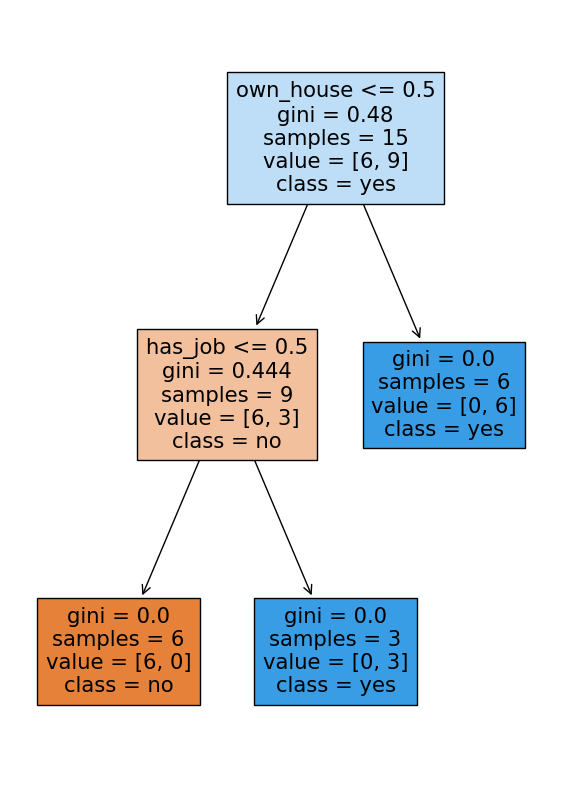

In [27]:
plt.figure(figsize=(7,10))
tree.plot_tree(clf, filled=True, feature_names = list(df3.columns[:-1]), class_names=['no', 'yes']);